In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('Data Science Jobs preprocessed.csv')
df.drop("Unnamed: 0",axis=1,inplace=True)
df.head()

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Size,Founded,Type of ownership,Industry,...,Machine Learning,SQL,Computer Science,Deep Learning,Big Data/Spark,Visualization Tool,Data Science,Experience,Grade Required,Company Age
0,Data Analytics,$38.00 - $45.00 Per Hour (Employer est.),Minimum three years experience in data science...,3.9,J & S Consulting,"Tucker, GA",51 to 200 Employees,--,Company - Private,Information Technology Support Services,...,0,1,0,0,0,0,1,3,1,-1
1,Data Scientist,$120K - $130K (Employer est.),Data science: 1 year (Preferred). Expertise in...,4.0,element technologies,Remote,51 to 200 Employees,2000,Company - Private,Information Technology Support Services,...,1,0,0,0,0,0,1,1,1,24
2,Data Scientist,$66.82 - $80.54 Per Hour (Employer est.),End-to-end data and model pipeline deployment ...,4.4,Boston Technology,"Malvern, PA",51 to 200 Employees,2004,Company - Private,Information Technology Support Services,...,1,0,0,0,1,0,0,-1,0,20
3,Data Engineer,$105K - $160K (Employer est.),Communicates technical concepts to non-technic...,3.9,Costco Wholesale,"Dallas, TX",10000+ Employees,1976,Company - Public,General Merchandise & Superstores,...,1,0,0,0,0,0,0,-1,0,48
4,Data Science Co-Op,$84K - $109K (Glassdoor est.),Work with source control tools like GIT to sav...,4.1,Hunter Engineering Company,"Bridgeton, MO",1001 to 5000 Employees,1946,Company - Private,Machinery Manufacturing,...,1,0,1,0,0,0,0,-1,0,78


In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Size', 'Founded', 'Type of ownership',
       'Industry', 'Sector', 'Revenue', 'URL', 'Glassdoor Estimate',
       'Employeer Estimate', 'Per Hour', 'Minimum Salary', 'Maximum Salary',
       'Average Salary', 'State', 'Refined Job Title', 'Seniority', 'Analysis',
       'Machine Learning', 'SQL', 'Computer Science', 'Deep Learning',
       'Big Data/Spark', 'Visualization Tool', 'Data Science', 'Experience',
       'Grade Required', 'Company Age'],
      dtype='object')

In [4]:
df.drop(["Job Title","Salary Estimate","Job Description","Location","Founded","URL"],axis=1,inplace=True)

In [5]:
df.head()

,Rating,Company Name,Size,Type of ownership,Industry,Sector,Revenue,Glassdoor Estimate,Employeer Estimate,Per Hour,...,Machine Learning,SQL,Computer Science,Deep Learning,Big Data/Spark,Visualization Tool,Data Science,Experience,Grade Required,Company Age
0,3.9,J & S Consulting,51 to 200 Employees,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),0,1,1,...,0,1,0,0,0,0,1,3,1,-1
1,4.0,element technologies,51 to 200 Employees,Company - Private,Information Technology Support Services,Information Technology,Unknown / Non-Applicable,0,1,0,...,1,0,0,0,0,0,1,1,1,24
2,4.4,Boston Technology,51 to 200 Employees,Company - Private,Information Technology Support Services,Information Technology,$5 to $25 million (USD),0,1,1,...,1,0,0,0,1,0,0,-1,0,20
3,3.9,Costco Wholesale,10000+ Employees,Company - Public,General Merchandise & Superstores,Retail & Wholesale,Unknown / Non-Applicable,0,1,0,...,1,0,0,0,0,0,0,-1,0,48
4,4.1,Hunter Engineering Company,1001 to 5000 Employees,Company - Private,Machinery Manufacturing,Manufacturing,$500 million to $1 billion (USD),1,0,0,...,1,0,1,0,0,0,0,-1,0,78


# Job And Salary

<Axes: title={'center': 'Maximum Salaries Being offered'}, xlabel='Refined Job Title'>

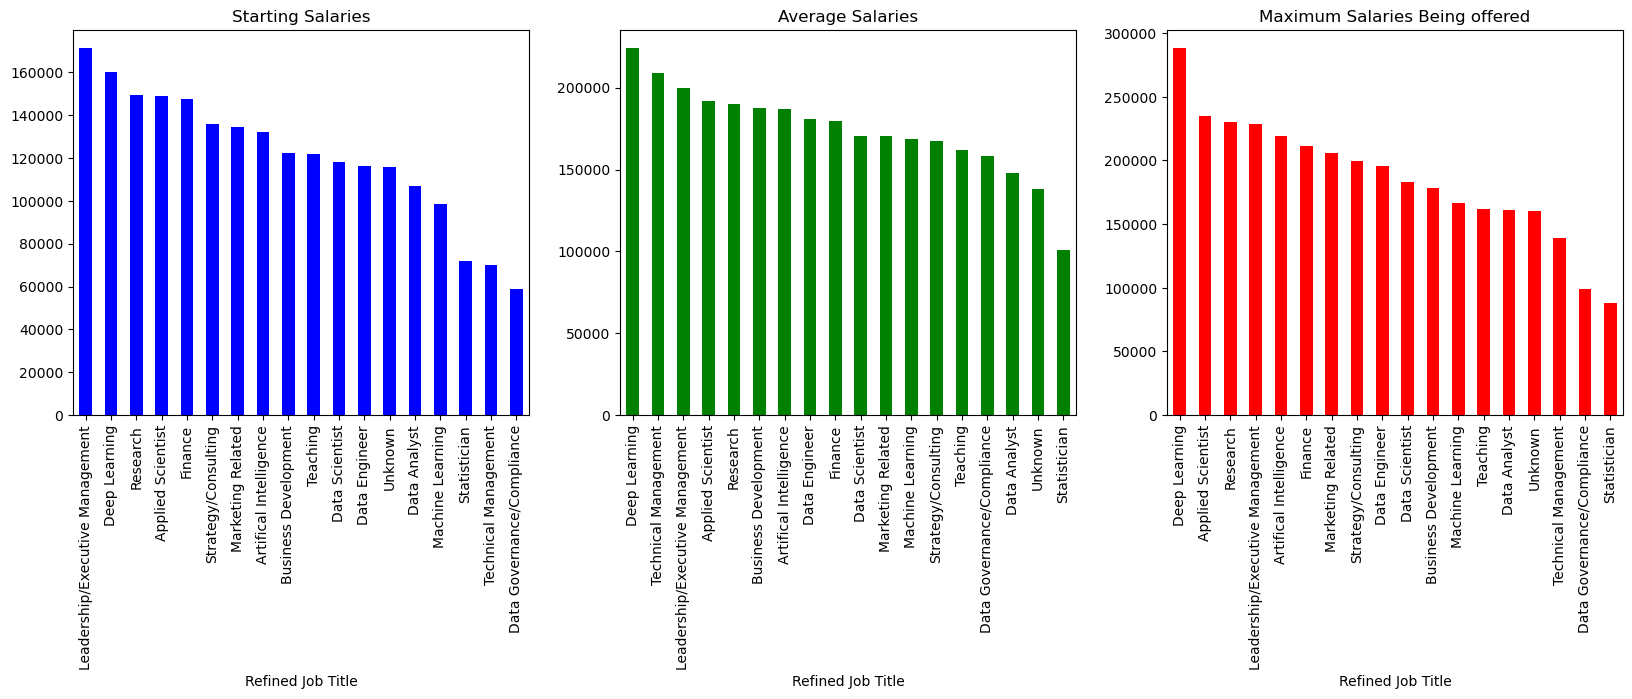

In [6]:
fig,ax=plt.subplots(1,3,figsize=(20,5))
df.groupby(by="Refined Job Title")["Minimum Salary"].mean().sort_values(ascending=False).plot.bar(ax=ax[0],color="blue",title="Starting Salaries")
df.groupby(by="Refined Job Title")["Average Salary"].mean().sort_values(ascending=False).plot.bar(ax=ax[1],color="green",title="Average Salaries")
df.groupby(by="Refined Job Title")["Maximum Salary"].mean().sort_values(ascending=False).plot.bar(ax=ax[2],color="red",title="Maximum Salaries Being offered")

# Salary And State 

<Axes: xlabel='State'>

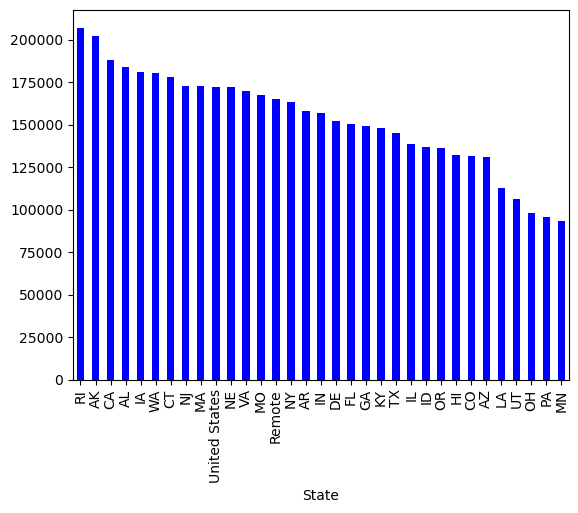

In [7]:
df.groupby(by="State")["Average Salary"].mean().sort_values(ascending=False).plot.bar(color="blue")

# Number of Jobs and States

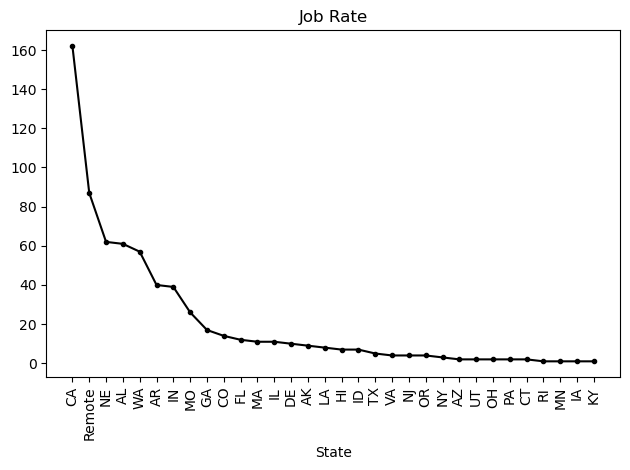

In [8]:
temp = df[df["State"] != "United States"]
grouped_data = temp.groupby("State")["Average Salary"].count().sort_values(ascending=False)
ax = grouped_data.plot.line(color="black",title="Job Rate", marker='.')
ax.set_xticks(range(len(grouped_data)))
ax.set_xticklabels(grouped_data.index, rotation=90)
plt.tight_layout()
plt.show()

# Experience And Salary

<Axes: xlabel='Experience'>

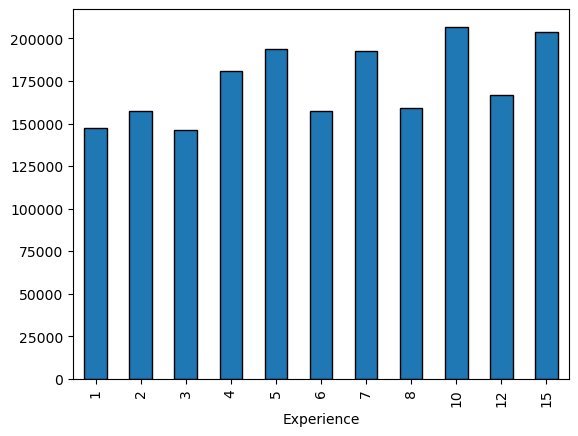

In [10]:
temp=df[df["Experience"]!=-1]
temp.groupby('Experience')["Average Salary"].mean().plot.bar(edgecolor='black')

# Grade demand??

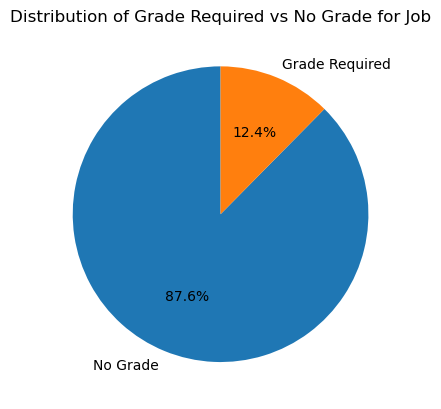

In [17]:
NoGrade=len(df[df["Grade Required"]==0])
Grade=len(df)-NoGrade
plt.pie([NoGrade, Grade], labels=['No Grade', 'Grade Required'], autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Grade Required vs No Grade for Job')
plt.show()

# Age and Experience

Text(0.5, 1.0, '2D Histogram of Experience vs Company Age')

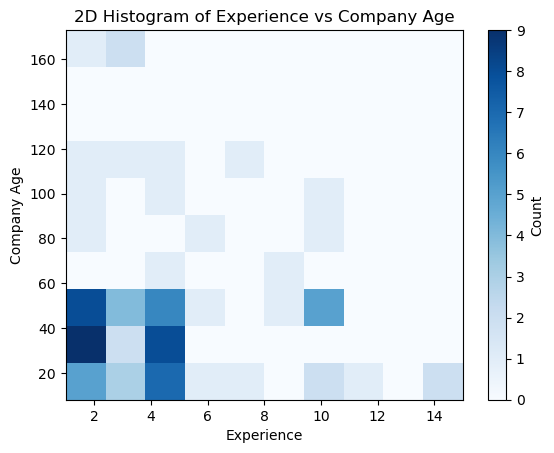

In [52]:
temp=df[(df["Experience"]!=-1) & (df["Company Age"]!=-1)]
plt.hist2d(temp["Experience"], temp["Company Age"], bins=10, cmap='Blues')
plt.colorbar(label='Count')
plt.xlabel('Experience')
plt.ylabel('Company Age')
plt.title('2D Histogram of Experience vs Company Age')

# Age and Salary

C:\Users\testr\AppData\Local\Temp\ipykernel_22380\458145558.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp['Company Age Binned'] = pd.cut(temp['Company Age'], bins=bins)
C:\Users\testr\AppData\Local\Temp\ipykernel_22380\458145558.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  temp.groupby('Company Age Binned')['Average Salary'].mean().plot.bar(color='gray')


Text(0.5, 1.0, 'Average Salary by Binned Company Age')

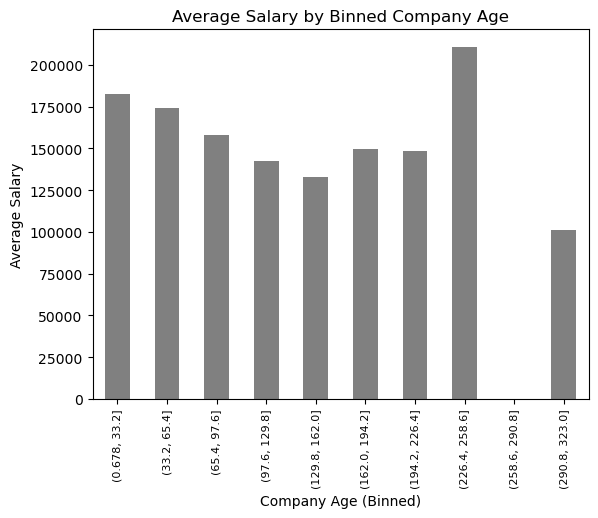

In [73]:
temp=df[df["Company Age"]!=-1]
bins = 10
temp['Company Age Binned'] = pd.cut(temp['Company Age'], bins=bins)
temp.groupby('Company Age Binned')['Average Salary'].mean().plot.bar(color='gray')
plt.xticks(rotation=90, size=8) 
plt.xlabel('Company Age (Binned)')
plt.ylabel('Average Salary')
plt.title('Average Salary by Binned Company Age')

# Seniority and Salary

Text(0.5, 1.0, 'Seniority and Salary')

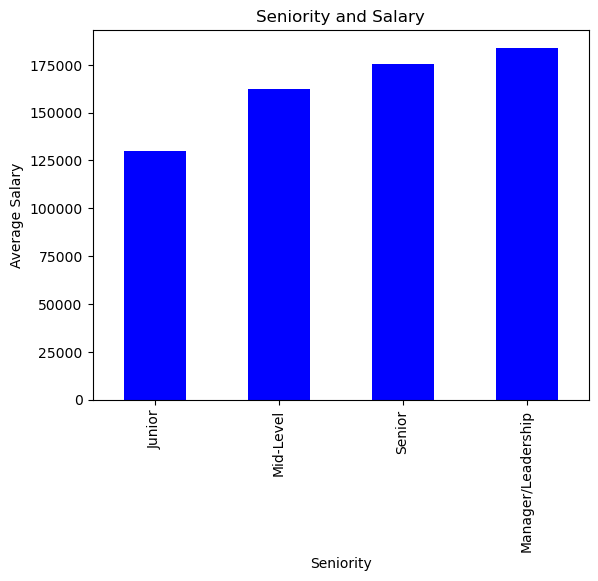

In [84]:
temp=df[df["Seniority"]!="Not Applicable"]
temp.groupby(by="Seniority")["Average Salary"].mean().sort_values().plot.bar(color='blue')
plt.ylabel("Average Salary")
plt.title("Seniority and Salary")

# Seniority and Size

In [89]:
df["Size"].unique()

array(['51 to 200 Employees', '10000+ Employees',
       '1001 to 5000 Employees', '1 to 50 Employees', 'Unknown',
       '501 to 1000 Employees', '201 to 500 Employees', '-1',
       '5001 to 10000 Employees'], dtype=object)

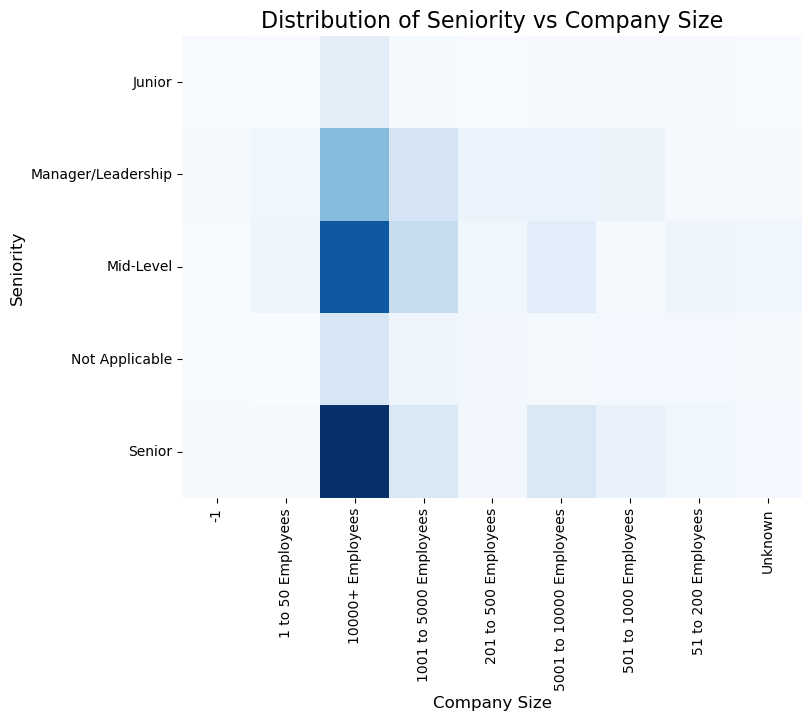

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
temp=df[(df["Seniority"]!="Not Applicable")&(df["Seniority"]!="Not Unknown") & (df["Seniority"]!="-1")]
counts = pd.crosstab(df['Seniority'], df['Size'])

plt.figure(figsize=(8, 6))
sns.heatmap(counts, annot=False, cmap='Blues', cbar=False)

plt.title("Distribution of Seniority vs Company Size", fontsize=16)
plt.xlabel("Company Size", fontsize=12)
plt.ylabel("Seniority", fontsize=12)
plt.show()


In [96]:
df.columns

Index(['Rating', 'Company Name', 'Size', 'Type of ownership', 'Industry',
       'Sector', 'Revenue', 'Glassdoor Estimate', 'Employeer Estimate',
       'Per Hour', 'Minimum Salary', 'Maximum Salary', 'Average Salary',
       'State', 'Refined Job Title', 'Seniority', 'Analysis',
       'Machine Learning', 'SQL', 'Computer Science', 'Deep Learning',
       'Big Data/Spark', 'Visualization Tool', 'Data Science', 'Experience',
       'Grade Required', 'Company Age'],
      dtype='object')